In [2]:
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin

from sklearn.model_selection import BaseCrossValidator

from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.utils.validation import check_array
from sklearn.utils.multiclass import check_classification_targets
from sklearn.metrics.pairwise import pairwise_distances

In [3]:
from sklearn.datasets import make_blobs



X, y = make_blobs(n_samples=20, n_features=2, random_state=0,  )

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
X_train, y_train

(array([[-1.87481616,  3.07423123],
        [-3.2331742 ,  4.86865766],
        [ 2.10102604,  0.71047981],
        [ 4.32502215, -0.55670201],
        [ 1.28933778,  3.44969159],
        [-2.57545698,  1.49786432],
        [ 1.7373078 ,  4.42546234],
        [ 1.9263585 ,  4.15243012],
        [ 1.16748177, -1.08313281],
        [-0.29661333,  4.12026211],
        [ 2.47034915,  4.09862906],
        [ 2.21021495,  1.27582618],
        [ 1.12031365,  5.75806083],
        [-2.03655619,  2.47980796],
        [-0.49772229,  1.55128226]]),
 array([2, 2, 1, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1]))

In [6]:
X_test

array([[ 2.91970372,  0.15549864],
       [-1.91423083,  2.61557951],
       [ 1.42013331,  4.63746165],
       [ 0.87305123,  4.71438583],
       [ 3.58804674,  2.36702243]])

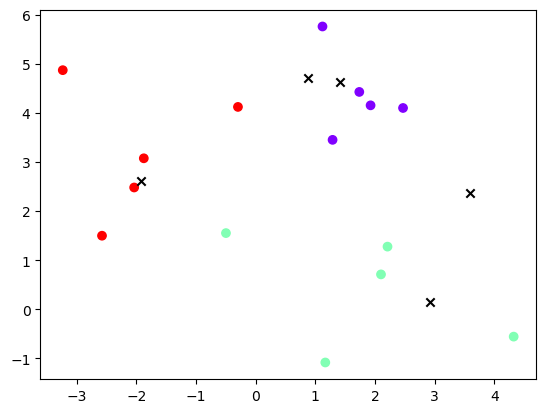

In [7]:
## plot the training set
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')
# croix noir pour les points de test

plt.scatter(X_test[:, 0], X_test[:, 1], c='k', marker='x')

---
---
---


In [8]:
from sklearn.utils import shuffle

In [74]:
shuffle_data = False
date = pd.date_range(start='2020-01-01', end='2021-01-31', freq='D')

n_samples = len(date)
X = pd.DataFrame(range(n_samples), index=date, columns=['val'])
y = pd.DataFrame(
    np.array([i % 2 for i in range(n_samples)]),
    index=date
)



if shuffle_data:
    X, y = shuffle(X, y, random_state=0)

X.reset_index(inplace=True)
X = X.rename(columns={'index': 'date'})
X.sort_values(by='date', inplace=True)
X_ = X.copy()
n_splits = (X_['date'].dt.to_period('M').iloc[-1] - X_['date'].dt.to_period('M').iloc[0]).n

In [77]:
X

,date,val
0,2020-01-01,0
1,2020-01-02,1
2,2020-01-03,2
3,2020-01-04,3
4,2020-01-05,4
...,...,...
392,2021-01-27,392
393,2021-01-28,393
394,2021-01-29,394
395,2021-01-30,395


In [75]:
for i in range(n_splits):

            idx_train = np.where(X['date'].dt.month == i)[0]
            idx_test = np.where(X['date'].dt.month == i+1)[0]

In [81]:
idx_train = np.arange(n_samples)[
                    X['date'].dt.month == n_splits-1 
                ]
idx_test = np.arange(n_samples)[
                    X['date'].dt.month == n_splits
                ]

In [82]:
print(idx_train)
print(idx_test)

[305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334]
[335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352
 353 354 355 356 357 358 359 360 361 362 363 364 365]


In [88]:
n_samples = X.shape[0]
for i in range(n_splits):
    idx_train = np.arange(n_samples)[
                    X['date'].dt.month == i 
                ]
    idx_test = np.arange(n_samples)[
                    X['date'].dt.month == i+1
                ]

In [90]:
X = X['date'].reset_index(drop=True)
X1 = X['date'].sort_values()

In [100]:
for i in range(n_splits):
    month_train = X1.dt.month.unique()[i % 12]
    year_train = X1.dt.year.unique()[i // 12]
    idx_train = X[(X.dt.year == year_train) &
                (X.dt.month == month_train)].index
    idx_train = np.array(idx_train)
    month_test = X1.dt.month.unique()[(i + 1) % 12]
    year_test = X1.dt.year.unique()[(i + 1) // 12]
    idx_test = X[(X.dt.year == month_test) &
                    (X.dt.month == month_test)].index
    idx_test = np.array(idx_test)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59]
[31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89 90]
[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89 90]
[ 91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120]
[ 91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120]
[121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151]
[121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151]
[152 153 154 155 156 157 158 159

In [103]:
n_splits

12